In [69]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [70]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = None

In [71]:
import pandas as pd
# Load the dataset
df_daily_activities = pd.read_csv('daily_activities.csv')
# Load the dataset
df_daily_matches_summary = pd.read_csv('data_matches_summary.csv')
# Load the dataset
df_user_purchase_summary_inApp = pd.read_csv('user_purchase_summary_inApp.csv')
# Load the dataset
df_user_purchase_summary_virtual = pd.read_csv('user_purchase_summary_virtual.csv')

In [72]:
df_daily_activities.head()
df_daily_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28230 entries, 0 to 28229
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              28230 non-null  int64 
 1   acquisition_date     28230 non-null  object
 2   last_active_date     28230 non-null  object
 3   platform_used        28230 non-null  object
 4   total_active_days    28230 non-null  int64 
 5   total_activity_days  28230 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [73]:
df_daily_matches_summary.head()

,user_id,first_match_date,last_match_date,most_common_match_type,total_matches,avg_bots_per_match,avg_position_per_match,total_play_days,days_between_first_last_match
0,272069,2024-04-12,2024-04-20,A,7,0.800000,2.800000,2,8
1,272070,2024-03-19,2024-05-01,B,662,1.147309,2.614731,44,43
2,272071,2024-04-15,2024-04-27,B,17,1.800000,2.733333,6,12
3,272073,2024-04-12,2024-04-12,B,2,3.000000,2.000000,1,0
4,272077,2024-03-27,2024-04-30,B,3,3.000000,3.000000,3,34


In [74]:
df_user_purchase_summary_inApp.head()

,user_id,total_purchase_app,purchase_count_app,first_purchase_date,last_purchase_date,purchase_days_count,most_purchased_product,avg_inapp_purchase_value
0,272143,4.99,1,2024-03-01,2024-03-01,1,Gold,4.99
1,272161,9.99,1,2024-04-15,2024-04-15,1,Gold,9.99
2,272164,129.94,6,2024-04-15,2024-05-01,4,Gold,21.66
3,272189,89.86,14,2024-03-06,2024-04-21,10,Promotion,6.42
4,272192,9.98,2,2024-04-14,2024-04-14,1,Promotion,4.99


In [75]:
df_user_purchase_summary_virtual.head()

,user_id,total_gold_spend,product_purchases_count,first_gold_spend_date,last_gold_spend_date,gold_purchase_days_count,most_purchased_virtual_product,average_spend_per_product
0,272070,163,6,2024-03-17,2024-04-04,6,Weapon,27.17
1,272071,27,2,2024-04-03,2024-04-12,2,Weapon,13.50
2,272077,17,2,2024-03-23,2024-03-24,2,Weapon,8.50
3,272079,68,1,2024-04-15,2024-04-15,1,Weapon,68.00
4,272082,36,2,2024-04-02,2024-04-04,2,Weapon,18.00


In [76]:
df_merged_data=pd.merge(df_daily_activities,df_daily_matches_summary, on='user_id',how='left')
df_merged_data=pd.merge(df_merged_data,df_user_purchase_summary_inApp, on='user_id',how='left')
df_merged_data=pd.merge(df_merged_data,df_user_purchase_summary_virtual, on='user_id',how='left')
df_merged_data

,user_id,acquisition_date,last_active_date,platform_used,total_active_days,total_activity_days,first_match_date,last_match_date,most_common_match_type,total_matches,avg_bots_per_match,avg_position_per_match,total_play_days,days_between_first_last_match,total_purchase_app,purchase_count_app,first_purchase_date,last_purchase_date,purchase_days_count,most_purchased_product,avg_inapp_purchase_value,total_gold_spend,product_purchases_count,first_gold_spend_date,last_gold_spend_date,gold_purchase_days_count,most_purchased_virtual_product,average_spend_per_product
0,272069,2024-03-01,2024-05-01,ios,53,62,2024-04-12,2024-04-20,A,7,0.800000,2.800000,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,272070,2024-03-16,2024-05-01,android,47,47,2024-03-19,2024-05-01,B,662,1.147309,2.614731,44,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,6.0,2024-03-17,2024-04-04,6.0,Weapon,27.17
2,272071,2024-04-01,2024-05-01,android,28,31,2024-04-15,2024-04-27,B,17,1.800000,2.733333,6,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,2.0,2024-04-03,2024-04-12,2.0,Weapon,13.50
3,272073,2024-04-04,2024-04-30,android,22,27,2024-04-12,2024-04-12,B,2,3.000000,2.000000,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,272077,2024-03-23,2024-05-01,ios,36,40,2024-03-27,2024-04-30,B,3,3.000000,3.000000,3,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,2.0,2024-03-23,2024-03-24,2.0,Weapon,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28225,309398,2024-03-12,2024-03-21,android,8,10,2024-03-17,2024-03-19,B,3,3.000000,2.000000,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2024-03-14,2024-03-14,1.0,Weapon,5.00
28226,309399,2024-03-01,2024-04-14,android,13,45,2024-03-18,2024-03-18,A,1,3.000000,1.000000,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,2.0,2024-03-01,2024-03-11,2.0,Weapon,17.00
28227,309400,2024-03-23,2024-04-30,android,30,39,2024-04-04,2024-04-04,A,1,3.000000,1.000000,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2024-03-27,2024-03-27,1.0,Weapon,5.00
28228,309401,2024-03-31,2024-04-03,android,4,4,2024-04-03,2024-04-03,B,8,2.000000,2.400000,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,3.0,2024-03-31,2024-04-03,3.0,Weapon,15.33


In [77]:
df_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28230 entries, 0 to 28229
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         28230 non-null  int64  
 1   acquisition_date                28230 non-null  object 
 2   last_active_date                28230 non-null  object 
 3   platform_used                   28230 non-null  object 
 4   total_active_days               28230 non-null  int64  
 5   total_activity_days             28230 non-null  int64  
 6   first_match_date                28230 non-null  object 
 7   last_match_date                 28230 non-null  object 
 8   most_common_match_type          28230 non-null  object 
 9   total_matches                   28230 non-null  int64  
 10  avg_bots_per_match              28230 non-null  float64
 11  avg_position_per_match          28230 non-null  float64
 12  total_play_days                 

In [78]:
def change_dtype(df):
    for col in df.columns:
        if df[col].dtype=='int64' or df[col].dtype=='float64':
            df.fillna({col: 0}, inplace=True)
        else:
            df.fillna({col:'No activity'}, inplace=True)

change_dtype(df_merged_data)



In [79]:
df_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28230 entries, 0 to 28229
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         28230 non-null  int64  
 1   acquisition_date                28230 non-null  object 
 2   last_active_date                28230 non-null  object 
 3   platform_used                   28230 non-null  object 
 4   total_active_days               28230 non-null  int64  
 5   total_activity_days             28230 non-null  int64  
 6   first_match_date                28230 non-null  object 
 7   last_match_date                 28230 non-null  object 
 8   most_common_match_type          28230 non-null  object 
 9   total_matches                   28230 non-null  int64  
 10  avg_bots_per_match              28230 non-null  float64
 11  avg_position_per_match          28230 non-null  float64
 12  total_play_days                 

# Convert to datetime with correct format
df_merged_data['acquisition_date'] = pd.to_datetime(df_merged_data['acquisition_date'], format='%Y-%m-%d')
df_merged_data['last_date_daily_activities'] = pd.to_datetime(df_merged_data['last_date_daily_activities'], format='%Y-%m-%d')
df_merged_data['first_active_date_played_match '] = pd.to_datetime(df_merged_data['first_activity_date'], format='%Y-%m-%d')
df_merged_data['last_activity_date'] = pd.to_datetime(df_merged_data['last_activity_date'], format='%Y-%m-%d')

df_merged_data

In [80]:
#df_merged_data.columns = df_merged_data.columns.str.lower()
df_merged_data.head()

,user_id,acquisition_date,last_active_date,platform_used,total_active_days,total_activity_days,first_match_date,last_match_date,most_common_match_type,total_matches,avg_bots_per_match,avg_position_per_match,total_play_days,days_between_first_last_match,total_purchase_app,purchase_count_app,first_purchase_date,last_purchase_date,purchase_days_count,most_purchased_product,avg_inapp_purchase_value,total_gold_spend,product_purchases_count,first_gold_spend_date,last_gold_spend_date,gold_purchase_days_count,most_purchased_virtual_product,average_spend_per_product
0,272069,2024-03-01,2024-05-01,ios,53,62,2024-04-12,2024-04-20,A,7,0.800000,2.800000,2,8,0.0,0.0,No activity,No activity,0.0,No activity,0.0,0.0,0.0,No activity,No activity,0.0,No activity,0.00
1,272070,2024-03-16,2024-05-01,android,47,47,2024-03-19,2024-05-01,B,662,1.147309,2.614731,44,43,0.0,0.0,No activity,No activity,0.0,No activity,0.0,163.0,6.0,2024-03-17,2024-04-04,6.0,Weapon,27.17
2,272071,2024-04-01,2024-05-01,android,28,31,2024-04-15,2024-04-27,B,17,1.800000,2.733333,6,12,0.0,0.0,No activity,No activity,0.0,No activity,0.0,27.0,2.0,2024-04-03,2024-04-12,2.0,Weapon,13.50
3,272073,2024-04-04,2024-04-30,android,22,27,2024-04-12,2024-04-12,B,2,3.000000,2.000000,1,0,0.0,0.0,No activity,No activity,0.0,No activity,0.0,0.0,0.0,No activity,No activity,0.0,No activity,0.00
4,272077,2024-03-23,2024-05-01,ios,36,40,2024-03-27,2024-04-30,B,3,3.000000,3.000000,3,34,0.0,0.0,No activity,No activity,0.0,No activity,0.0,17.0,2.0,2024-03-23,2024-03-24,2.0,Weapon,8.50


In [81]:
df_merged_data.columns = df_merged_data.columns.str.lower()

In [82]:
df_merged_data.columns

Index(['user_id', 'acquisition_date', 'last_active_date', 'platform_used',
       'total_active_days', 'total_activity_days', 'first_match_date',
       'last_match_date', 'most_common_match_type', 'total_matches',
       'avg_bots_per_match', 'avg_position_per_match', 'total_play_days',
       'days_between_first_last_match', 'total_purchase_app',
       'purchase_count_app', 'first_purchase_date', 'last_purchase_date',
       'purchase_days_count', 'most_purchased_product',
       'avg_inapp_purchase_value', 'total_gold_spend',
       'product_purchases_count', 'first_gold_spend_date',
       'last_gold_spend_date', 'gold_purchase_days_count',
       'most_purchased_virtual_product', 'average_spend_per_product'],
      dtype='object')

In [85]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Select columns related to engagement and spending
engagement_columns = ['total_active_days', 'total_activity_days','total_matches', 'avg_bots_per_match', 'avg_position_per_match', 
                      'total_play_days','days_between_first_last_match']
spending_columns = ['total_purchase_app','purchase_count_app','purchase_days_count','avg_inapp_purchase_value', 'total_gold_spend',
                    'product_purchases_count',  'gold_purchase_days_count', 'average_spend_per_product']

# Create a DataFrame with selected columns
selected_df = df_merged_data[engagement_columns + spending_columns]

In [86]:
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_df)
data=standardized_data = scaler.fit_transform(selected_df)


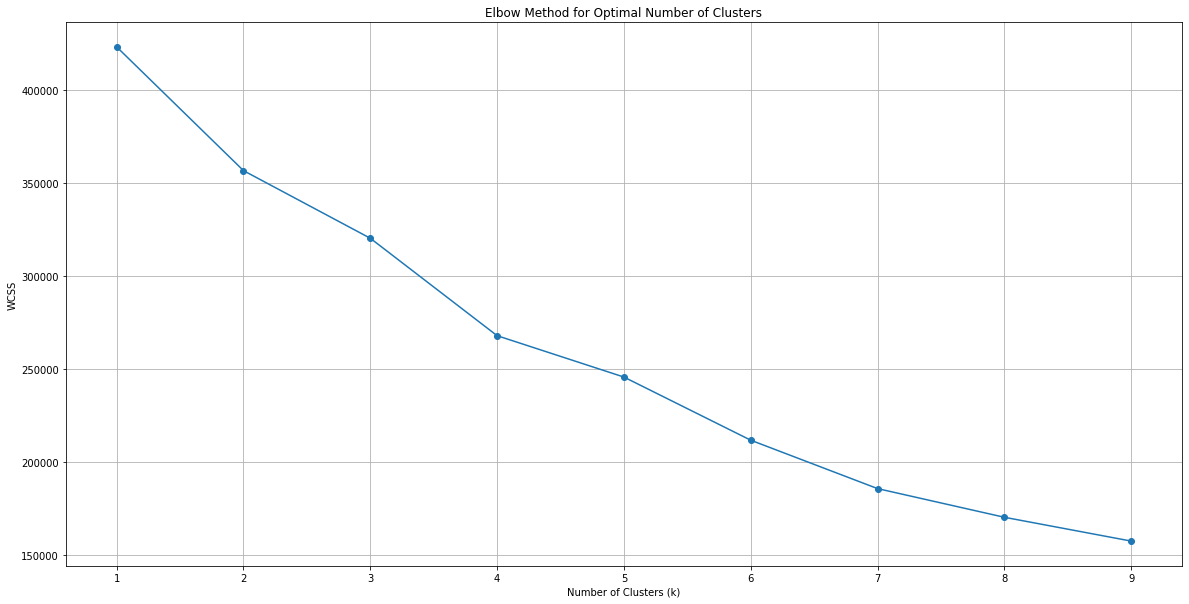

The optimal number of clusters based on the Elbow Method is 8.
Number of clusters = 2, WCSS = 356835.45, Percentage change = 15.73%
Number of clusters = 3, WCSS = 320427.30, Percentage change = 10.20%
Number of clusters = 4, WCSS = 267974.95, Percentage change = 16.37%
Number of clusters = 5, WCSS = 245695.56, Percentage change = 8.31%
Number of clusters = 6, WCSS = 211700.16, Percentage change = 13.84%
Number of clusters = 7, WCSS = 185645.09, Percentage change = 12.31%
Number of clusters = 8, WCSS = 170212.05, Percentage change = 8.31%
Number of clusters = 9, WCSS = 157391.04, Percentage change = 7.53%


In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# List to store WCSS values
wcss = []
# Range of clusters to try
range_n_clusters = range(1, 10)

# Run KMeans and calculate WCSS for each k
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the model

# Plotting the Elbow Graph
plt.figure(figsize=(20, 10))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Calculate percentage change in WCSS
percentage_changes =  [(wcss[i - 1] - wcss[i]) / wcss[i - 1] * 100 for i in range(1, len(wcss))]

# Find the elbow point where the percentage change starts to slow down
# You can define a threshold to decide where the rate of change slows down significantly
threshold = 8  # Adjust this threshold as needed
elbow_point = None

for i in range(1, len(percentage_changes)):
    if percentage_changes[i] < threshold:
        elbow_point = i + 1  # Adjust for 1-based index
        break

if elbow_point is not None:
    print(f'The optimal number of clusters based on the Elbow Method is {elbow_point}.')
else:
    print('No clear elbow found. Consider adjusting the threshold or range of clusters.')

# Optionally, print out WCSS values to inspect percentage changes
for i in range(1, len(range_n_clusters)):
    prev_wcss = wcss[i - 1]  # WCSS for the previous number of clusters
    current_wcss = wcss[i]   # WCSS for the current number of clusters
    
    # Calculate the percentage change from previous to current WCSS
    percentage_change = ((prev_wcss - current_wcss) / prev_wcss) * 100
    
    # Print out the number of clusters, WCSS, and percentage change
    print(f'Number of clusters = {range_n_clusters[i]}, WCSS = {current_wcss:.2f}, Percentage change = {percentage_change:.2f}%')


In [89]:
from sklearn.cluster import KMeans

# Assume elbow_point has been determined and standardized_data is prepared
# Example: elbow_point = 7  # This should be determined from your elbow method analysis

# Apply K-means clustering
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
kmeans.fit(standardized_data)

# Add the cluster labels to the original DataFrame
# Use .loc to avoid SettingWithCopyWarning
selected_df.loc[:, 'cluster'] = kmeans.labels_ + 1


C:\Users\44775\AppData\Local\Temp\ipykernel_3844\1138292586.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.loc[:, 'cluster'] = kmeans.labels_ + 1


In [90]:
# Analyze clusters by examining the mean values for each cluster
cluster_analysis = selected_df.groupby('cluster')[engagement_columns + spending_columns].mean()
round(cluster_analysis,2)


,total_active_days,total_activity_days,total_matches,avg_bots_per_match,avg_position_per_match,total_play_days,days_between_first_last_match,total_purchase_app,purchase_count_app,purchase_days_count,avg_inapp_purchase_value,total_gold_spend,product_purchases_count,gold_purchase_days_count,average_spend_per_product
cluster,,,,,,,,,,,,,,,
1,36.29,50.04,36.26,1.36,2.50,6.54,21.09,0.00,0.00,0.00,0.00,98.26,1.52,1.50,51.63
2,14.00,23.24,2.35,2.95,1.31,1.19,0.73,0.00,0.00,0.00,0.00,44.72,1.79,1.79,19.53
3,10.98,17.96,16.96,1.55,2.61,2.85,3.98,0.00,0.00,0.00,0.00,42.32,1.62,1.58,19.31
4,44.29,49.15,435.32,0.97,2.53,33.09,42.15,0.73,0.14,0.13,0.29,347.38,4.09,3.93,83.26
5,51.00,53.00,20.00,0.54,1.69,4.00,9.00,1240.72,128.00,30.00,9.69,483263.00,28.00,28.00,17259.39
6,34.30,42.52,223.70,1.86,2.10,13.06,20.77,124.61,18.92,10.97,7.55,27831.82,20.11,14.04,2738.79
7,18.88,28.22,25.64,2.20,1.89,3.68,7.26,14.69,2.73,2.14,5.33,1959.59,4.93,3.95,426.83
8,29.76,38.91,18.61,2.22,2.12,3.30,7.92,0.01,0.00,0.00,0.01,239.78,7.40,7.23,31.87


In [93]:
import pandas as pd

# Sample DataFrame based on provided data
data = {
    'total_active_days': [36.29, 14.00, 10.98, 44.29, 51.00, 34.30, 18.88, 29.76],
    'total_activity_days': [50.04, 23.24, 17.96, 49.15, 53.00, 42.52, 28.22, 38.91],
    'total_matches': [36.26, 2.35, 16.96, 435.32, 20.00, 223.70, 25.64, 18.61],
    'avg_bots_per_match': [1.36, 2.95, 1.55, 0.97, 0.54, 1.86, 2.20, 2.22],
    'avg_position_per_match': [2.50, 1.31, 2.61, 2.53, 1.69, 2.10, 1.89, 2.12],
    'total_play_days': [6.54, 1.19, 2.85, 33.09, 4.00, 13.06, 3.68, 3.30],
    'days_between_first_last_match': [21.09, 1.19, 3.98, 42.15, 9.00, 20.77, 7.26, 7.92],
    'total_purchase_app': [0.00, 0.73, 0.00, 0.73, 1240.72, 124.61, 14.69, 0.01],
    'purchase_count_app': [0.00, 0.00, 0.00, 0.14, 128.00, 18.92, 2.73, 0.00],
    'purchase_days_count': [0.00, 0.00, 0.00, 0.13, 30.00, 10.97, 2.14, 0.00],
    'avg_inapp_purchase_value': [0.00, 0.00, 0.00, 0.29, 9.69, 7.55, 5.33, 0.01],
    'total_gold_spend': [98.26, 44.72, 42.32, 347.38, 483263.00, 27831.82, 1959.59, 239.78],
    'product_purchases_count': [1.52, 1.79, 1.62, 4.09, 28.00, 20.11, 4.93, 7.40],
    'gold_purchase_days_count': [1.50, 1.79, 1.58, 3.93, 28.00, 14.04, 3.95, 7.23],
    'average_spend_per_product': [51.63, 19.53, 19.31, 83.26, 17259.39, 2738.79, 426.83, 31.87],
}
index = [1, 2, 3, 4, 5, 6, 7, 8]
selected_fd = pd.DataFrame(data, index=index)

# Calculate the correlation of 'avg_bots_per_match' with other metrics
correlations = selected_fd.corr()['avg_bots_per_match']

print(correlations)


total_active_days               -0.765217
total_activity_days             -0.684475
total_matches                   -0.361145
avg_bots_per_match               1.000000
avg_position_per_match          -0.464495
total_play_days                 -0.434672
days_between_first_last_match   -0.514952
total_purchase_app              -0.609436
purchase_count_app              -0.605116
purchase_days_count             -0.566094
avg_inapp_purchase_value        -0.355847
total_gold_spend                -0.612860
product_purchases_count         -0.466831
gold_purchase_days_count        -0.531703
average_spend_per_product       -0.605569
Name: avg_bots_per_match, dtype: float64


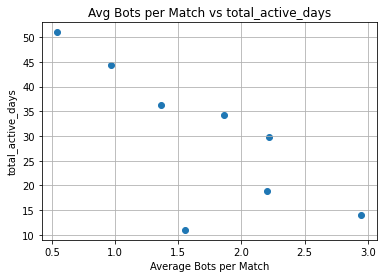

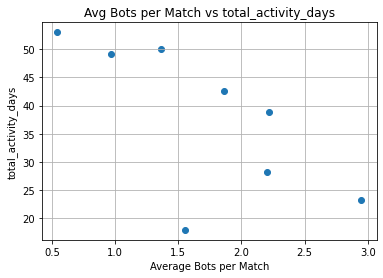

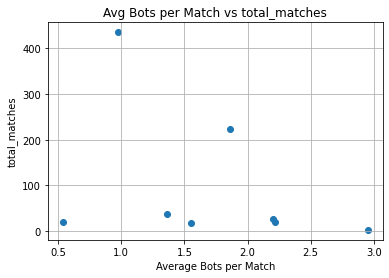

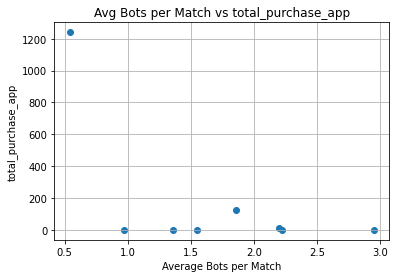

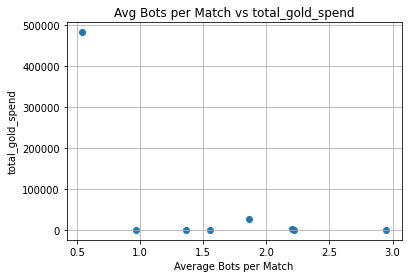

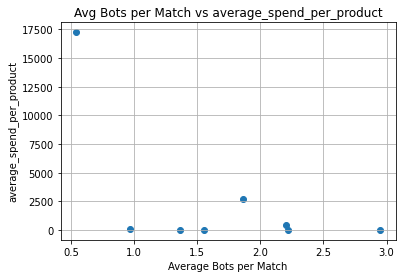

In [94]:
import matplotlib.pyplot as plt

# Create scatter plots to visualize the relationship between 'avg_bots_per_match' and other metrics
metrics = ['total_active_days', 'total_activity_days', 'total_matches', 'total_purchase_app', 'total_gold_spend', 'average_spend_per_product']

for metric in metrics:
    plt.scatter(selected_fd['avg_bots_per_match'], selected_fd[metric])
    plt.title(f'Avg Bots per Match vs {metric}')
    plt.xlabel('Average Bots per Match')
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()


In [91]:
round(cluster_analysis,2).to_csv('cluster_analysis.csv')

In [92]:
df_cluster=pd.concat([df_merged_data,selected_df['cluster']],axis=1)
df_cluster

,user_id,acquisition_date,last_active_date,platform_used,total_active_days,total_activity_days,first_match_date,last_match_date,most_common_match_type,total_matches,avg_bots_per_match,avg_position_per_match,total_play_days,days_between_first_last_match,total_purchase_app,purchase_count_app,first_purchase_date,last_purchase_date,purchase_days_count,most_purchased_product,avg_inapp_purchase_value,total_gold_spend,product_purchases_count,first_gold_spend_date,last_gold_spend_date,gold_purchase_days_count,most_purchased_virtual_product,average_spend_per_product,cluster
0,272069,2024-03-01,2024-05-01,ios,53,62,2024-04-12,2024-04-20,A,7,0.800000,2.800000,2,8,0.0,0.0,No activity,No activity,0.0,No activity,0.0,0.0,0.0,No activity,No activity,0.0,No activity,0.00,1
1,272070,2024-03-16,2024-05-01,android,47,47,2024-03-19,2024-05-01,B,662,1.147309,2.614731,44,43,0.0,0.0,No activity,No activity,0.0,No activity,0.0,163.0,6.0,2024-03-17,2024-04-04,6.0,Weapon,27.17,4
2,272071,2024-04-01,2024-05-01,android,28,31,2024-04-15,2024-04-27,B,17,1.800000,2.733333,6,12,0.0,0.0,No activity,No activity,0.0,No activity,0.0,27.0,2.0,2024-04-03,2024-04-12,2.0,Weapon,13.50,1
3,272073,2024-04-04,2024-04-30,android,22,27,2024-04-12,2024-04-12,B,2,3.000000,2.000000,1,0,0.0,0.0,No activity,No activity,0.0,No activity,0.0,0.0,0.0,No activity,No activity,0.0,No activity,0.00,2
4,272077,2024-03-23,2024-05-01,ios,36,40,2024-03-27,2024-04-30,B,3,3.000000,3.000000,3,34,0.0,0.0,No activity,No activity,0.0,No activity,0.0,17.0,2.0,2024-03-23,2024-03-24,2.0,Weapon,8.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28225,309398,2024-03-12,2024-03-21,android,8,10,2024-03-17,2024-03-19,B,3,3.000000,2.000000,2,2,0.0,0.0,No activity,No activity,0.0,No activity,0.0,5.0,1.0,2024-03-14,2024-03-14,1.0,Weapon,5.00,2
28226,309399,2024-03-01,2024-04-14,android,13,45,2024-03-18,2024-03-18,A,1,3.000000,1.000000,1,0,0.0,0.0,No activity,No activity,0.0,No activity,0.0,34.0,2.0,2024-03-01,2024-03-11,2.0,Weapon,17.00,2
28227,309400,2024-03-23,2024-04-30,android,30,39,2024-04-04,2024-04-04,A,1,3.000000,1.000000,1,0,0.0,0.0,No activity,No activity,0.0,No activity,0.0,5.0,1.0,2024-03-27,2024-03-27,1.0,Weapon,5.00,2
28228,309401,2024-03-31,2024-04-03,android,4,4,2024-04-03,2024-04-03,B,8,2.000000,2.400000,1,0,0.0,0.0,No activity,No activity,0.0,No activity,0.0,46.0,3.0,2024-03-31,2024-04-03,3.0,Weapon,15.33,3
